In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.shape

(400, 3)

### Exploratory Data Analysis

In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

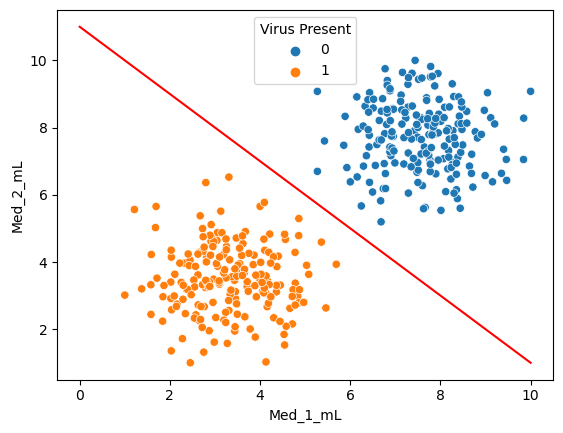

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df, hue = 'Virus Present')
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,'r')

### SVM - Support Vector Machine

In [9]:
from sklearn.svm import SVC #SV Classifier

In [10]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

In [12]:
#help(SVC)

In [22]:
model = SVC(kernel='linear',C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [23]:
from svm_margin_plot import plot_svm_boundary

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


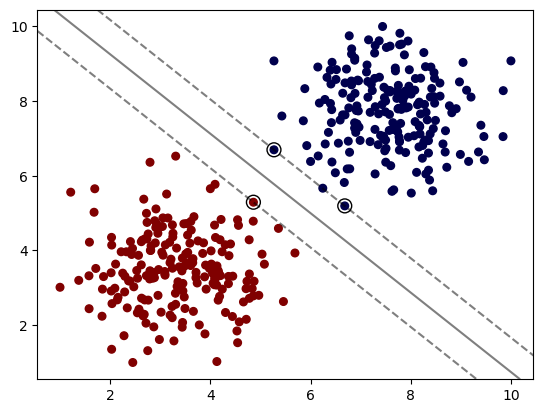

In [24]:
plot_svm_boundary(model,X,y)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


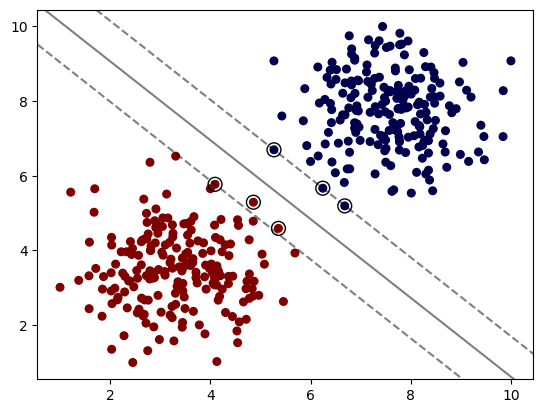

In [28]:
model = SVC(kernel='linear',C=.5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### RBF

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


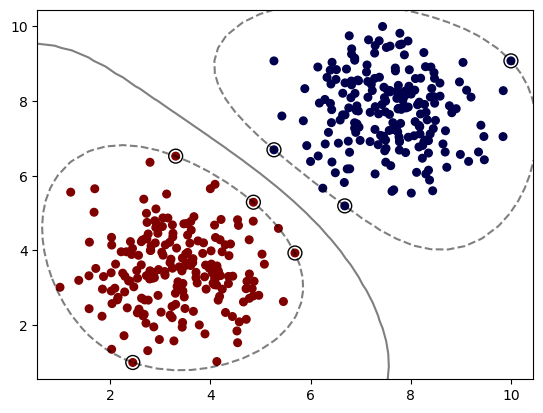

In [30]:
model = SVC(kernel='rbf',C=10)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Sigmoid

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


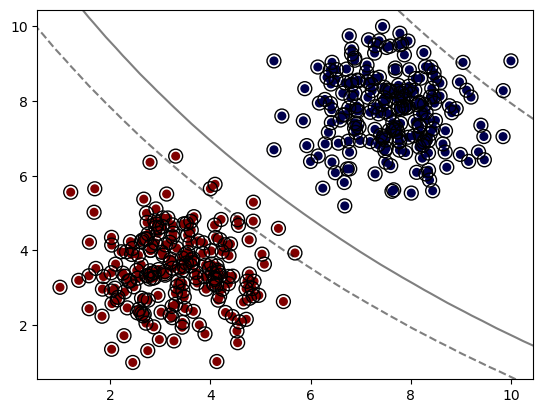

In [32]:
model = SVC(kernel='sigmoid',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Poly Kernel

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


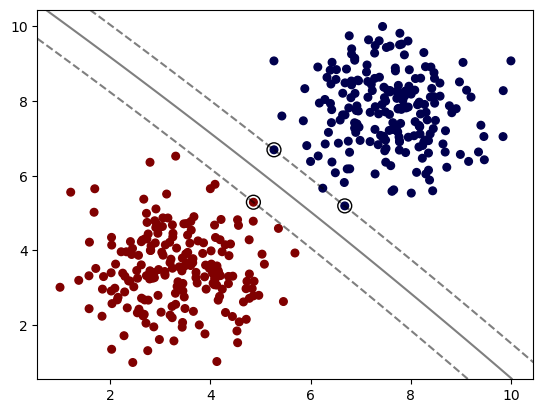

In [36]:
model = SVC(kernel='poly',C=1, degree=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Gamma

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


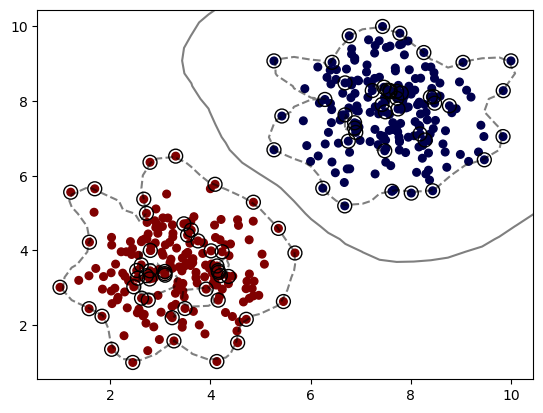

In [40]:
model = SVC(kernel='rbf',C=1, gamma=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
svm = SVC()
param_grid = {'C':[0.01,0.05,0.1,0.5,1],
             'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [43]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [44]:
grid.best_score_

1.0

In [45]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}